In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("mall.csv")

In [3]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


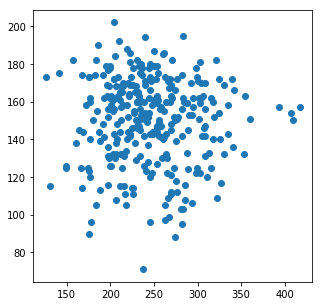

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(df["INCOME"],df["SPEND"])
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
ke = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300,random_state=101)

In [8]:
ke.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [9]:
ke.inertia_

297101.3764201943

In [17]:
centroids = ke.cluster_centers_

c_df = pd.DataFrame(centroids,columns=["X","Y"])

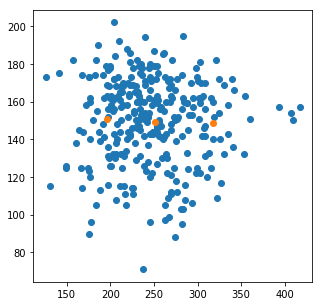

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(df["INCOME"],df["SPEND"])
plt.scatter(c_df["X"],c_df["Y"])
plt.show()

In [19]:
labels = ke.predict(df)

In [20]:
labels

array([0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1,

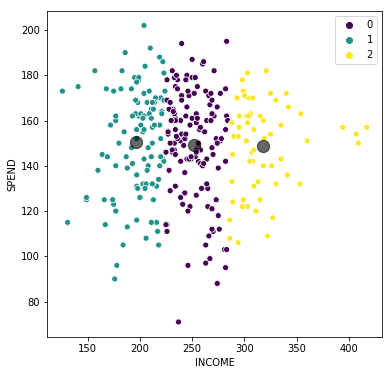

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue=labels,palette="viridis")
plt.scatter(c_df["X"],c_df["Y"], c='black',s=150, alpha=0.6);
plt.show()

In [27]:
k_list = [1,2,3,4,5,6,7,8,9,10]
wcss = []

for k in k_list:
    ke1 = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300,random_state=101)
    ke1.fit(df)
    wcss.append(ke1.inertia_)

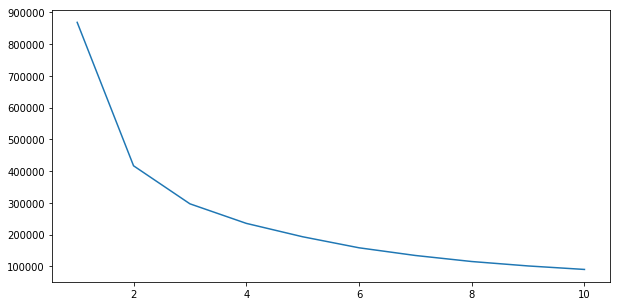

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(y=wcss,x=k_list)
plt.show()

In [31]:
ke2 = KMeans(n_clusters=6, init="k-means++", n_init=10, max_iter=300,random_state=101)

In [32]:
ke2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [35]:
labels2 = ke2.predict(df) 

centroids2 = ke2.cluster_centers_

c_df2 = pd.DataFrame(centroids2,columns=["X","Y"])

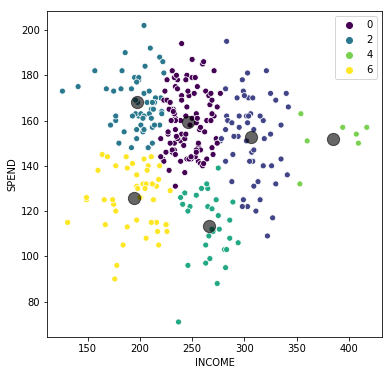

In [37]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue=labels2,palette="viridis")
plt.scatter(c_df2["X"],c_df2["Y"], c='black',s=150, alpha=0.6);
plt.show()

In [ ]:
# Hierarchical clustering